# Machine Learning Homework 1: Perceptron
### Xiangci Li

This .ip

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from perceptron import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
spam_train_file = "percept_data/spam_train.txt"
test_file = "percept_data/spam_test.txt"
train_file = "train.txt"
val_file = "validation.txt"
split(spam_train_file, train_file, val_file)

In [3]:
X = 20
WORDS = words(train_file,X)
corpus_size = len(WORDS)
print corpus_size

3115


In [4]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
save_feature_vector(WORDS, train_file, train_feature_file, "Training Data")
save_feature_vector(WORDS, val_file, val_feature_file, "Validation Data")
save_feature_vector(WORDS, test_file, test_feature_file, "Test Data")

Training Data
Processed 0 emails.
Processed 100 emails.
Processed 200 emails.
Processed 300 emails.
Processed 400 emails.
Processed 500 emails.
Processed 600 emails.
Processed 700 emails.
Processed 800 emails.
Processed 900 emails.
Processed 1000 emails.
Processed 1100 emails.
Processed 1200 emails.
Processed 1300 emails.
Processed 1400 emails.
Processed 1500 emails.
Processed 1600 emails.
Processed 1700 emails.
Processed 1800 emails.
Processed 1900 emails.
Processed 2000 emails.
Processed 2100 emails.
Processed 2200 emails.
Processed 2300 emails.
Processed 2400 emails.
Processed 2500 emails.
Processed 2600 emails.
Processed 2700 emails.
Processed 2800 emails.
Processed 2900 emails.
Processed 3000 emails.
Processed 3100 emails.
Processed 3200 emails.
Processed 3300 emails.
Processed 3400 emails.
Processed 3500 emails.
Processed 3600 emails.
Processed 3700 emails.
Processed 3800 emails.
Processed 3900 emails.
Finished processingTraining Data.
Validation Data
Processed 0 emails.
Processe

In [5]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
training_data, train_label = load_feature_vector(train_feature_file)
validation_data, val_label = load_feature_vector(val_feature_file)
test_data, test_label = load_feature_vector(test_feature_file)
print training_data.shape
print validation_data.shape
print test_data.shape

(4000, 3115)
(1000, 3115)
(1000, 3115)


In [6]:
W, k, iter = perceptron_train(training_data, train_label, verbose=True)
print k
print iter

Number of iteration: 1, Accuracy: 0.945250
Number of iteration: 2, Accuracy: 0.978750
Number of iteration: 3, Accuracy: 0.988500
Number of iteration: 4, Accuracy: 0.994000
Number of iteration: 5, Accuracy: 0.995000
Number of iteration: 6, Accuracy: 0.996750
Number of iteration: 7, Accuracy: 0.998250
Number of iteration: 8, Accuracy: 0.999750
Number of iteration: 9, Accuracy: 1.000000
415
9


In [7]:
perceptron_error(W, validation_data, val_label)

0.019000000000000017

In [10]:
for PASS in range(1,10):
    print PASS
    W, k, iter = perceptron_train(training_data, train_label, max_pass=PASS)
    error = perceptron_error(W, validation_data, val_label)
    print error

1
0.026
2
0.032
3
0.071
4
0.02
5
0.016
6
0.017
7
0.019
8
0.019
9
0.019


In [13]:
negativeindex = np.copy(W).argsort()[:12]
positiveindex = np.copy(W).argsort()[-12:][::-1]
print "Most negative 12 words:"
print "'word' with corresponding weights:"
for index in negativeindex:
    print WORDS[index], W[index]
print 
print "Most positive 12 words:"
print "'words' with corresponding weights:"
for index in positiveindex:
    print WORDS[index], W[index]

Most negative 12 words:
'word' with corresponding weights:
wrote -16.0
prefer -14.0
i -13.0
there -12.0
reserv -12.0
run -11.0
server -11.0
url -11.0
said -11.0
copyright -11.0
still -11.0
but -10.0

Most positive 12 words:
'words' with corresponding weights:
sight 20.0
click 16.0
remov 16.0
pleas 15.0
internet 14.0
deathtospamdeathtospamdeathtospam 13.0
these 13.0
guarante 13.0
am 12.0
our 12.0
ever 11.0
offer 11.0


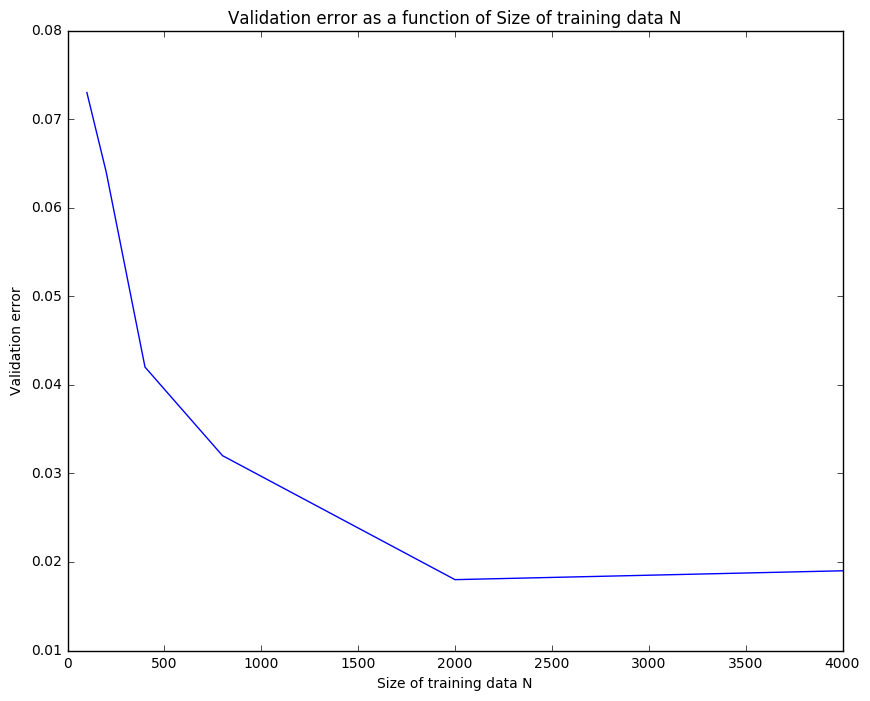

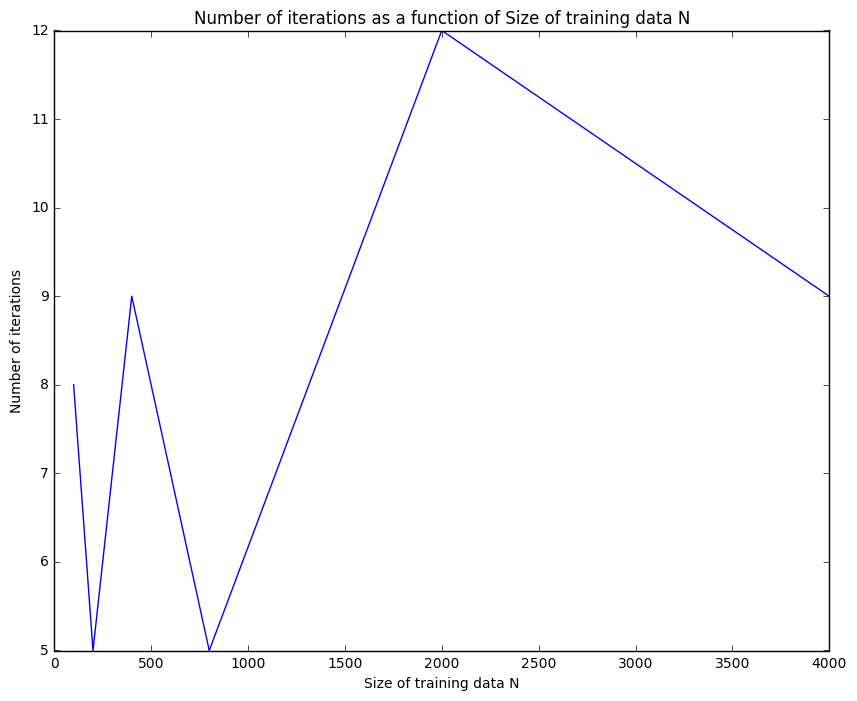

In [9]:
N = [100,200,400,800,2000,4000]
#N = range(100,4100,100)
val_errors = []
iters = []
for n in N:
    training_data, train_label = load_feature_vector(train_feature_file,n)
    W, k, iter = perceptron_train(training_data, train_label)
    val_error = perceptron_error(W, validation_data, val_label)
    val_errors.append(val_error)
    iters.append(iter)

plt.plot(N, val_errors)
plt.xlabel('Size of training data N')
plt.ylabel('Validation error')
plt.title('Validation error as a function of Size of training data N')
plt.show()

plt.plot(N, iters)
plt.xlabel('Size of training data N')
plt.ylabel('Number of iterations')
plt.title('Number of iterations as a function of Size of training data N')
plt.show()

In [14]:
train_size = 4000
val_size = 1000
test_size = 1000
training_data, train_label = load_feature_vector(train_feature_file)
validation_data, val_label = load_feature_vector(val_feature_file)
test_data, test_label = load_feature_vector(test_feature_file)
new_training_data = np.concatenate((training_data,validation_data),axis=0)
new_training_label = np.concatenate((train_label,val_label),axis=0)
print new_training_data.shape
print new_training_label.shape

(5000, 3115)
(5000,)


In [15]:
W, k, iter = perceptron_train(new_training_data, new_training_label, verbose=False, max_pass=100)
error = perceptron_error(W, test_data, test_label)
print k, iter
print error

707 100
0.02


In [19]:
X = 30
WORDS = words(train_file,X)
corpus_size = len(WORDS)
print corpus_size

2376


In [18]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
save_feature_vector(WORDS, train_file, train_feature_file, "Training Data")
save_feature_vector(WORDS, val_file, val_feature_file, "Validation Data")
save_feature_vector(WORDS, test_file, test_feature_file, "Test Data")

Training Data
Processed 0 emails.
Processed 100 emails.
Processed 200 emails.
Processed 300 emails.
Processed 400 emails.
Processed 500 emails.
Processed 600 emails.
Processed 700 emails.
Processed 800 emails.
Processed 900 emails.
Processed 1000 emails.
Processed 1100 emails.
Processed 1200 emails.
Processed 1300 emails.
Processed 1400 emails.
Processed 1500 emails.
Processed 1600 emails.
Processed 1700 emails.
Processed 1800 emails.
Processed 1900 emails.
Processed 2000 emails.
Processed 2100 emails.
Processed 2200 emails.
Processed 2300 emails.
Processed 2400 emails.
Processed 2500 emails.
Processed 2600 emails.
Processed 2700 emails.
Processed 2800 emails.
Processed 2900 emails.
Processed 3000 emails.
Processed 3100 emails.
Processed 3200 emails.
Processed 3300 emails.
Processed 3400 emails.
Processed 3500 emails.
Processed 3600 emails.
Processed 3700 emails.
Processed 3800 emails.
Processed 3900 emails.
Finished processingTraining Data.
Validation Data
Processed 0 emails.
Processe

In [21]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
training_data, train_label = load_feature_vector(train_feature_file)
validation_data, val_label = load_feature_vector(val_feature_file)
test_data, test_label = load_feature_vector(test_feature_file)
print training_data.shape
print validation_data.shape
print test_data.shape

(4000, 2376)
(1000, 2376)
(1000, 2376)


In [25]:
for PASS in range(1,12):
    print PASS
    W, k, iter = perceptron_train(training_data, train_label, max_pass=PASS)
    error = perceptron_error(W, validation_data, val_label)
    print error

1
0.032
2
0.025
3
0.024
4
0.021
5
0.025
6
0.019
7
0.022
8
0.022
9
0.016
10
0.015
11
0.015


In [43]:
X = 30
WORDS = words(train_file,X)
corpus_size = len(WORDS)
print corpus_size

2376


In [44]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
save_feature_vector(WORDS, train_file, train_feature_file, "Training Data")
save_feature_vector(WORDS, val_file, val_feature_file, "Validation Data")
save_feature_vector(WORDS, test_file, test_feature_file, "Test Data")

Training Data
Processed 0 emails.
Processed 100 emails.
Processed 200 emails.
Processed 300 emails.
Processed 400 emails.
Processed 500 emails.
Processed 600 emails.
Processed 700 emails.
Processed 800 emails.
Processed 900 emails.
Processed 1000 emails.
Processed 1100 emails.
Processed 1200 emails.
Processed 1300 emails.
Processed 1400 emails.
Processed 1500 emails.
Processed 1600 emails.
Processed 1700 emails.
Processed 1800 emails.
Processed 1900 emails.
Processed 2000 emails.
Processed 2100 emails.
Processed 2200 emails.
Processed 2300 emails.
Processed 2400 emails.
Processed 2500 emails.
Processed 2600 emails.
Processed 2700 emails.
Processed 2800 emails.
Processed 2900 emails.
Processed 3000 emails.
Processed 3100 emails.
Processed 3200 emails.
Processed 3300 emails.
Processed 3400 emails.
Processed 3500 emails.
Processed 3600 emails.
Processed 3700 emails.
Processed 3800 emails.
Processed 3900 emails.
Finished processing Training Data.
Validation Data
Processed 0 emails.
Process

In [45]:
train_size = 4000
val_size = 1000
test_size = 1000
training_data, train_label = load_feature_vector(train_feature_file)
validation_data, val_label = load_feature_vector(val_feature_file)
test_data, test_label = load_feature_vector(test_feature_file)
new_training_data = np.concatenate((training_data,validation_data),axis=0)
new_training_label = np.concatenate((train_label,val_label),axis=0)
print new_training_data.shape
print new_training_label.shape

(5000, 2376)
(5000,)


In [47]:
for PASS in range(1,30):
    print PASS
    W, k, iter = perceptron_train(new_training_data, new_training_label, max_pass=PASS)
    error = perceptron_error(W, test_data, test_label)
    print error

1
0.041
2
0.028
3
0.024
4
0.018
5
0.019
6
0.023
7
0.021
8
0.019
9
0.024
10
0.021
11
0.021
12
0.025
13
0.024
14
0.023
15
0.024
16
0.024
17
0.024
18
0.024
19
0.024
20
0.024
21
0.024
22
0.024
23
0.024
24
0.024
25
0.024
26
0.024
27
0.024
28
0.024
29
0.024


In [48]:
X = 1200
WORDS = words(train_file,X)
corpus_size = len(WORDS)
print corpus_size

51


In [49]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
save_feature_vector(WORDS, train_file, train_feature_file, "Training Data")
save_feature_vector(WORDS, val_file, val_feature_file, "Validation Data")
save_feature_vector(WORDS, test_file, test_feature_file, "Test Data")

Training Data
Processed 0 emails.
Processed 100 emails.
Processed 200 emails.
Processed 300 emails.
Processed 400 emails.
Processed 500 emails.
Processed 600 emails.
Processed 700 emails.
Processed 800 emails.
Processed 900 emails.
Processed 1000 emails.
Processed 1100 emails.
Processed 1200 emails.
Processed 1300 emails.
Processed 1400 emails.
Processed 1500 emails.
Processed 1600 emails.
Processed 1700 emails.
Processed 1800 emails.
Processed 1900 emails.
Processed 2000 emails.
Processed 2100 emails.
Processed 2200 emails.
Processed 2300 emails.
Processed 2400 emails.
Processed 2500 emails.
Processed 2600 emails.
Processed 2700 emails.
Processed 2800 emails.
Processed 2900 emails.
Processed 3000 emails.
Processed 3100 emails.
Processed 3200 emails.
Processed 3300 emails.
Processed 3400 emails.
Processed 3500 emails.
Processed 3600 emails.
Processed 3700 emails.
Processed 3800 emails.
Processed 3900 emails.
Finished processing Training Data.
Validation Data
Processed 0 emails.
Process

In [50]:
train_feature_file = "train_feature.txt"
val_feature_file = "validation_feature.txt"
test_feature_file = "test_feature.txt"
training_data, train_label = load_feature_vector(train_feature_file)
validation_data, val_label = load_feature_vector(val_feature_file)
test_data, test_label = load_feature_vector(test_feature_file)
print training_data.shape
print validation_data.shape
print test_data.shape

(4000, 51)
(1000, 51)
(1000, 51)


In [52]:
for PASS in range(1,100):
    print PASS
    W, k, iter = perceptron_train(training_data, train_label, max_pass=PASS)
    error = perceptron_error(W, validation_data, val_label)
    print error

1
0.161
2
0.162
3
0.153
4
0.162
5
0.155
6
0.135
7
0.174
8
0.145
9
0.122
10
0.154
11
0.14
12
0.115
13
0.164
14
0.117
15
0.116
16
0.118
17
0.128
18
0.131
19
0.124
20
0.123
21
0.169
22
0.164
23
0.154
24
0.127
25
0.117
26
0.148
27
0.145
28
0.15
29
0.153
30
0.125
31
0.132
32
0.136
33
0.131
34
0.142
35
0.142
36
0.131
37
0.145
38
0.149
39
0.143
40
0.106
41
0.141
42
0.101
43
0.152
44
0.132
45
0.123
46
0.134
47
0.111
48
0.135
49
0.143
50
0.134
51
0.121
52
0.13
53
0.122
54
0.143
55
0.124
56
0.136
57
0.152
58
0.141
59
0.137
60
0.13
61
0.13
62
0.152
63
0.128
64
0.118
65
0.153
66
0.141
67
0.118
68
0.112
69
0.142
70
0.125
71
0.148
72
0.135
73
0.126
74
0.133
75
0.153
76
0.146
77
0.146
78
0.162
79
0.11
80
0.133
81
0.127
82
0.114
83
0.125
84
0.124
85
0.144
86
0.133
87
0.125
88
0.139
89
0.125
90
0.14
91
0.132
92
0.149
93
0.153
94
0.135
95
0.114
96
0.135
97
0.152
98
0.133
99
0.142
